### Student Details

Student Name: Mithun Thakkar

Student ID: 20017138

# Task 2: Naive Bayes Classifier

Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers


In [1]:
# import dependencies
import numpy as np
import pandas

In [2]:
# Read the data from the .csv, using the first row as the headers of the data
data = pandas.read_csv('01_heights_weights_genders.csv',header=0)

In [3]:
# Show just the first few samples so we know it's read correctly
data.head(n=3)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856


### Visualise


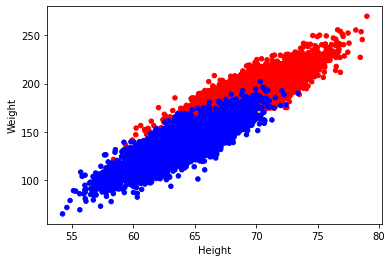

In [6]:
# We use a disctionary to map from gender to colour

colors ={"Male" : "red", "Female" : "blue"}

# Then I can use this new list of colours per entry to colour my objects
data.plot(kind='scatter',x="Height",y="Weight",c=data.Gender.map(colors));

We're trying to predict gender from height and weight. There isn't a great separation, but it would seem that we can be reasonably successful with it. Definitely a tendancy for males to be taller and heavier, females to be shorter and lighter

### Features and labels
The aim is to predict the gender of the person based on characteristics such as height, weight and foot size. So we call what we want to predict the "label" and the characteristics the "features". This will be covered more later in the module, but is a good enough understanding for now.

In [ ]:
X = data.iloc[:,1:3] # X is the features in our dataset
y = data.iloc[:,0]   # y is the Labels in our dataset

### Train/Test Split

We have a bunch of data from the csv file. What we need to do is decide what of that data we will use to train the algorithm, and what of that data will be used to see how good the result is. More on this later in the module, but you can't use the same data you train with to test the outcome, as it will naturally fit that very well, but you won't catch things like overfitting. 

There is some science to this, but for now we will randomly select one third for testing, and the rest for training.

In [8]:
# divide the dataset in train test using scikit learn
# now the model will train in training dataset and then we will use test dataset to predict its accuracy

X = data.iloc[:,1:3] # X is the features in our dataset
y = data.iloc[:,0]   # y is the Labels in our dataset

from sklearn.model_selection import train_test_split   # Notice the new way of pulling in the module?

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.33)

# Note the multiple variables being returned from the one function call?

### Train the algorithm
We won't go into the details here, but we will use a Gaussian Naive Bayesian. Use GaussianNB from sklearn to train the model. The Gaussian is needed as we're dealing with sparse, continuous data

In [9]:
from sklearn.naive_bayes import GaussianNB

# Here we are training our model ... use the training data
gender_model = GaussianNB().fit(X_train, y_train) #fitting our model

### Test the algorithm
Using the test data

In [10]:
# Now let us predict using the modle and our dataset

y_pred = gender_model.predict(X_test) #now predicting our model to our test dataset

print(X_test)
print()
print(y_pred)
print(y_test.values)

         Height      Weight
4278  71.408152  208.059374
6736  66.854977  164.243193
9623  65.707225  156.063311
7642  69.323614  166.637555
1793  68.020188  181.986734
...         ...         ...
3595  67.071189  176.912572
3291  71.456662  200.592582
7507  62.357727  122.112061
7071  61.464634  120.715163
9852  65.482728  135.278322

[3300 rows x 2 columns]

['Male' 'Male' 'Female' ... 'Female' 'Female' 'Female']
['Male' 'Female' 'Female' ... 'Female' 'Female' 'Female']


In [11]:
from sklearn.metrics import accuracy_score

# Check the accuracy by comparing our known test data gender with the predicted gender
accuracy_score = accuracy_score(y_test, y_pred) 
print (accuracy_score)

0.8809090909090909


### Plot the random samples

In [20]:
print(min(data.Height),max(data.Height))
print(min(data.Weight),max(data.Weight))

54.2631333250971 78.99874234638959
64.700126712753 269.989698505106


In [39]:
import random

Heights = []
Weights = []
for i in range(5000):
    Heights.append(random.uniform(50,100))
    Weights.append(random.uniform(70,300))
dict = {'Height': Heights, 
        'Weight': Weights, 
        } 
  
validation_set = pd.DataFrame(dict) 
validation_set 

<IPython.core.display.Javascript object>

,Height,Weight
0,66.170054,122.484053
1,68.571972,240.464550
2,84.900540,188.296109
3,69.552549,213.008608
4,78.193952,95.188933
...,...,...
4995,79.802764,92.785697
4996,71.583588,152.600073
4997,82.865283,264.458376
4998,83.467835,260.994408


In [40]:
validation_set.insert(2,"Gender",gender_model.predict(validation_set))

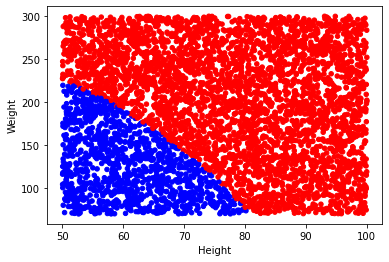

In [42]:
validation_set.plot(kind='scatter',x="Height",y="Weight",c=validation_set.Gender.map(colors));